In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from PIL import Image # to import image

In [3]:
dog =Image.open("/kaggle/input/d/alessiocorrado99/animals10/raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg")

In [4]:
from torchvision import transforms

In [5]:
convert = transforms.ToTensor() # to convert data to a tensor

In [6]:
convert(dog).shape

torch.Size([3, 225, 300])

In [7]:
flip = transforms.RandomHorizontalFlip(p=0.5) #flip the image horizontal with 0.5 probability

In [ ]:
flip(dog)

In [9]:
ver = transforms.RandomVerticalFlip(p=0.5) ##flip the image vertically with 0.5 probability

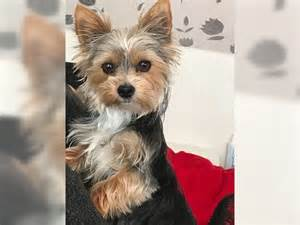

In [10]:
ver(dog)

In [11]:
rot = transforms.RandomRotation(180) #rotate the image

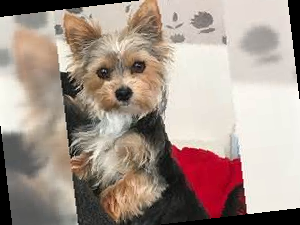

In [12]:
rot(dog)

In [42]:
cc = transforms.ColorJitter(brightness=2,contrast=2,saturation=2,hue=0.3)

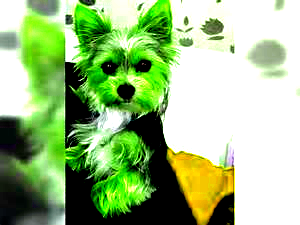

In [43]:
cc(dog)

In [49]:
aff = transforms.RandomAffine(45,translate =[0.3,0.3],scale=[0.5,0.5],shear=[0.1,0.8])

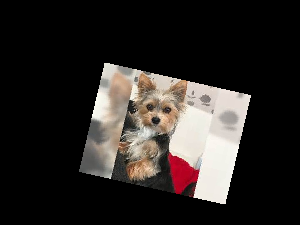

In [50]:
aff(dog)

In [14]:
combination = transforms.Compose([
    flip,
    ver,
    transforms.Resize((224,224)),
    convert
])

In [15]:
combination(dog)

tensor([[[0.9529, 0.9569, 0.9569,  ..., 0.3255, 0.3255, 0.3569],
         [0.9529, 0.9529, 0.9529,  ..., 0.3255, 0.3294, 0.3333],
         [0.9529, 0.9529, 0.9529,  ..., 0.3255, 0.3294, 0.3373],
         ...,
         [0.9412, 0.9373, 0.9373,  ..., 0.8941, 0.8980, 0.9020],
         [0.9451, 0.9412, 0.9412,  ..., 0.8980, 0.9020, 0.9059],
         [0.9451, 0.9412, 0.9412,  ..., 0.8980, 0.9020, 0.9059]],

        [[0.9333, 0.9373, 0.9373,  ..., 0.3333, 0.3333, 0.3647],
         [0.9333, 0.9333, 0.9333,  ..., 0.3333, 0.3373, 0.3412],
         [0.9333, 0.9333, 0.9333,  ..., 0.3333, 0.3373, 0.3451],
         ...,
         [0.9137, 0.9098, 0.9098,  ..., 0.8941, 0.8980, 0.9020],
         [0.9176, 0.9137, 0.9137,  ..., 0.8980, 0.9020, 0.9059],
         [0.9176, 0.9137, 0.9137,  ..., 0.8980, 0.9020, 0.9059]],

        [[0.9098, 0.9137, 0.9137,  ..., 0.3294, 0.3294, 0.3608],
         [0.9098, 0.9098, 0.9098,  ..., 0.3294, 0.3333, 0.3373],
         [0.9098, 0.9098, 0.9098,  ..., 0.3294, 0.3333, 0.

In [16]:
cat = Image.open("/kaggle/input/d/alessiocorrado99/animals10/raw-img/cane/OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg")

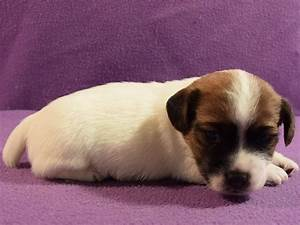

In [17]:
cat

In [18]:
abc = combination(cat)

In [19]:
abc.shape

torch.Size([3, 224, 224])

In [20]:
import torch.nn as nn

In [21]:
import torch.nn.functional as F

In [26]:
con1 = nn.Conv2d(3,10,(3,3),padding = 2,stride = 3)
con2 = nn.Conv2d(10,5,(3,3),padding = 2,stride = 3)
mp1 = nn.MaxPool2d(3,stride= 2)
mp2 = nn.MaxPool2d(2,stride= 1)

In [27]:
tn = con1(abc)
tn =mp1(tn)
tn = F.relu(tn)
tn = con2(tn)
tn = mp2(tn)
tn = F.relu(tn)

In [28]:
tn.shape

torch.Size([5, 12, 12])

In [29]:
tn.view(-1).shape

torch.Size([720])

In [30]:

lin = nn.Linear(tn.view(-1).shape[0],10)

In [31]:
lin(tn.view(-1))

tensor([ 0.0576,  0.0603,  0.0036,  0.0330,  0.0630,  0.0307,  0.0797,  0.1119,
        -0.0964, -0.0392], grad_fn=<ViewBackward0>)

In [35]:
transforms.ToPILImage() #to see the image at a intermediate step of the propagation

ToPILImage()